# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from scipy.spatial.distance import euclidean
import seaborn as sns

# Prepare Data

Few data samples and description

In [ ]:
irisData = datasets.load_iris()
print(irisData.data[:5])
print(irisData.target[:5])
print(irisData.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

Making DataFrame for plotting with seaborn

In [ ]:
df = pd.DataFrame(irisData.data, columns=['sepal length', 'sepal width', 'petal lenght', 'petal width'])
df.head()

,sepal length,sepal width,petal lenght,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


On graphs we can clearly see that our dataset might has at least 2 clusters, because we can see 2 different groups of data on some of the graphs, but we already know that is has 3 from data description.

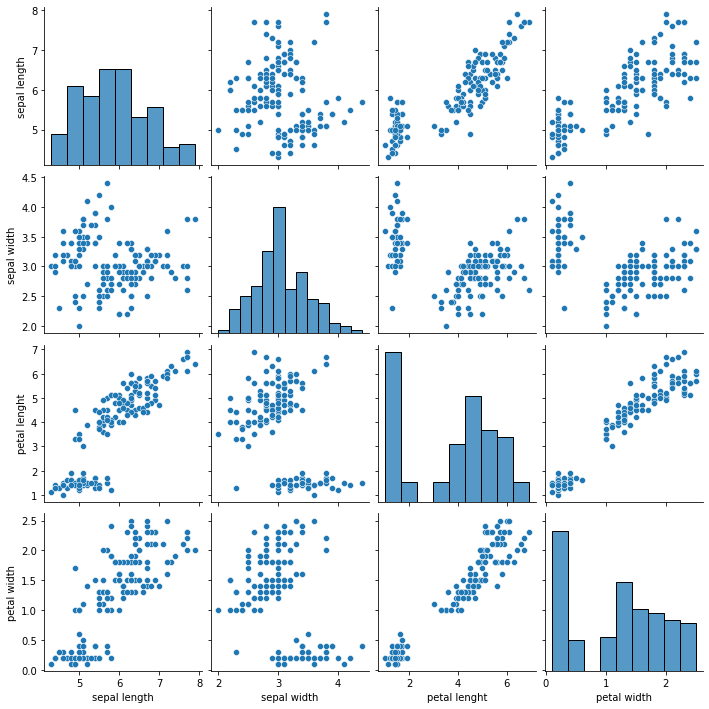

In [ ]:
sns.pairplot(df)
plt.show()

# KMeans Implementation

Steps:
* Randomly select the first centroid from the data points.
* For each data point compute its distance from the nearest, previously chosen centroid.
* Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
* Repeat steps 2 and 3 untill k centroids have been sampled

Creating function to get random initial centroids. I am using Kmeans++, so only the very first centroid is generated randomly

In [ ]:
def generateCentroids(k, dataset):
  randomCentroids = irisData.data[np.random.randint(0, len(dataset), 1)]
  for i in range(k-1):
    d = np.array([])
    for row in range(len(dataset)):
      d = np.append(d, euclidean(randomCentroids[i], dataset[row]))
    randomCentroids = np.append(randomCentroids, 
                              dataset[np.argmax(d)]).reshape(-1,4)
  return randomCentroids

Creating function that performs KMeans algorithm

In [ ]:
def KMeansPlusPlus(randomCentroids, data):
  errorCount = 1
  while errorCount > 0:
    distances = np.zeros(3)
    labels = np.array([], dtype='int8')

    for row in range(len(data)):
      for i in range(k):
        distances[i] = euclidean(randomCentroids[i], data[row])
      labels = np.append(labels, np.argmin(distances))

    sums = np.zeros(12).reshape(3,4)
    for index, label in enumerate(labels):
      sums[label] += data[index]

    for i in range(k):
      if sums[i].any():
        sums[i] /= (labels==i).sum()
        randomCentroids[i] = sums[i]

    newLabels = np.array([], dtype='int8')
    for row in range(len(data)):
      for i in range(k):
        distances[i] = euclidean(randomCentroids[i], data[row])
      newLabels = np.append(newLabels, np.argmin(distances))
      
    errorCount = 0
    for x,y in zip(labels, newLabels):
      if x != y:
        errorCount += 1
  return labels

Making prediction and printing our predicted labels

In [ ]:
k = 3 # Number of clusters
labels = KMeansPlusPlus(generateCentroids(k, irisData.data), irisData.data)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Visualization of predicted clusters

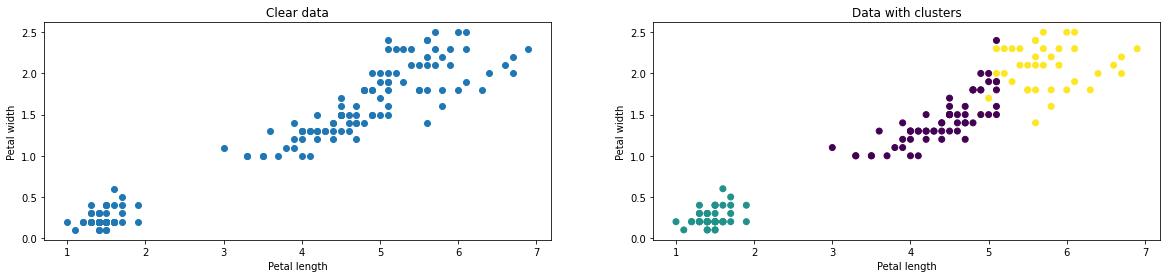

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.scatter(df['petal lenght'], df['petal width'])
plt.title('Clear data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.subplot(1, 2, 2)
plt.scatter(df['petal lenght'], df['petal width'], c=labels)
plt.title('Data with clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

Comparing my algorithm to sklearn's Kmeans algorithm

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(irisData.data)
pred = model.predict(irisData.data)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Visualisation of clusters that was predicted by my and sklearn algorithms

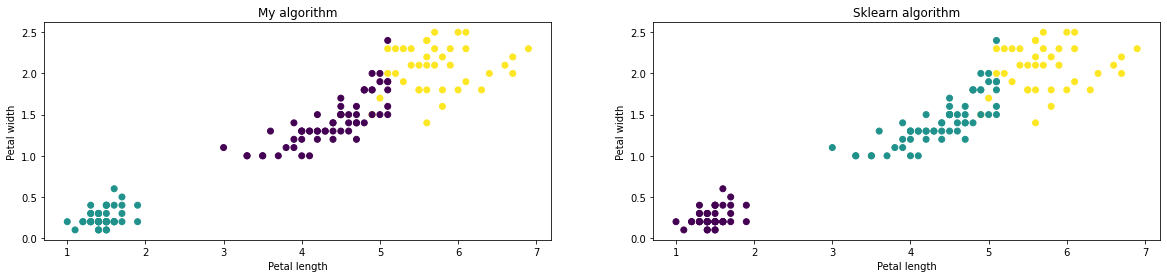

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.scatter(df['petal lenght'], df['petal width'], c=labels)
plt.title('My algorithm')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.subplot(1, 2, 2)
plt.scatter(df['petal lenght'], df['petal width'], c=pred)
plt.title('Sklearn algorithm')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

As we can see both graphs matches, so my algorithm is working properly

Suppose we don't know how many clusters are in our dataset. We can try to identify it by graphing model inertias. The goal is to have low inertia and the least number of clusters. We can see that k=3 works fine

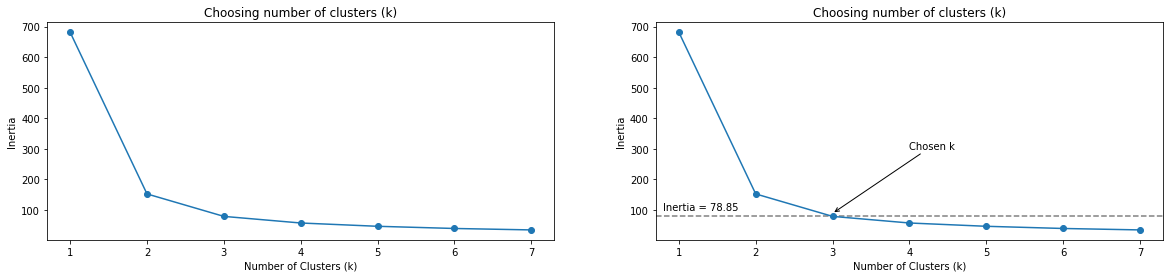

In [ ]:
inertias = np.array([])
for n in range(1,8,1):
  model = KMeans(n_clusters=n)
  model.fit(irisData.data)
  inertias=np.append(inertias, model.inertia_)

plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(range(1,8,1), inertias, '-o')
plt.title('Choosing number of clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

ax = plt.subplot(1, 2, 2)
ax.annotate("Chosen k", xy=(3, inertias[2]+10), xytext=(4, 300),
            arrowprops=dict(arrowstyle="->"))
plt.axhline(y=inertias[2], c='k', linestyle='--', alpha=0.5)
plt.text(x=0.8, y=100, s=f'Inertia = {np.round(inertias[2], decimals=2)}')
plt.plot(range(1,8,1), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Choosing number of clusters (k)')

plt.show()
